# Análisis de tiempos en filtro de partículas

El objetivo de este análisis es determinar qué funciones dentro del filtro consumen más tiempo de procesamiento para plantear alternativas en busca de su optimización. Además determinar el impacto en el tiempo de procesamiento de cada función con respecto al número de partículas y a la cantidad de landmarks de manera de intentar determinar futuros problemas cuando se escale el proyecto a mapas de entornos más grandes.
Para lograrlo se tomaron datos de los tiempos en segundos de cada etapa del procesamiento en las pruebas del robot y se guardaron en los siguiente archivos:

- out_10p_8lnd.txt:   10 partículas 8 landmarks
- out_10p_16lnd.txt:  10 partículas 16 landmarks
- out_10p_24lnd.txt:  10 partículas 24 landmarks
- out_100p_8lnd.txt:  10 partículas 8 landmarks
- out_100p_16lnd.txt: 100 partículas 16 landmarks
- out_100p_24lnd.txt: 100 partículas 24 landmarks
- out_30p_8lnd.txt:   30 partículas 8 landmarks
- out_30p_16lnd.txt:  30 partículas 16 landmarks
- out_30p_24lnd.txt:  30 partículas 24 landmarks


In [247]:
import matplotlib.pyplot as plt
import numpy as np
import statistics
%matplotlib inline

In [248]:
import os

Path = "./"
filelist = ['control_file.log']
print(filelist)

['control_file.log']


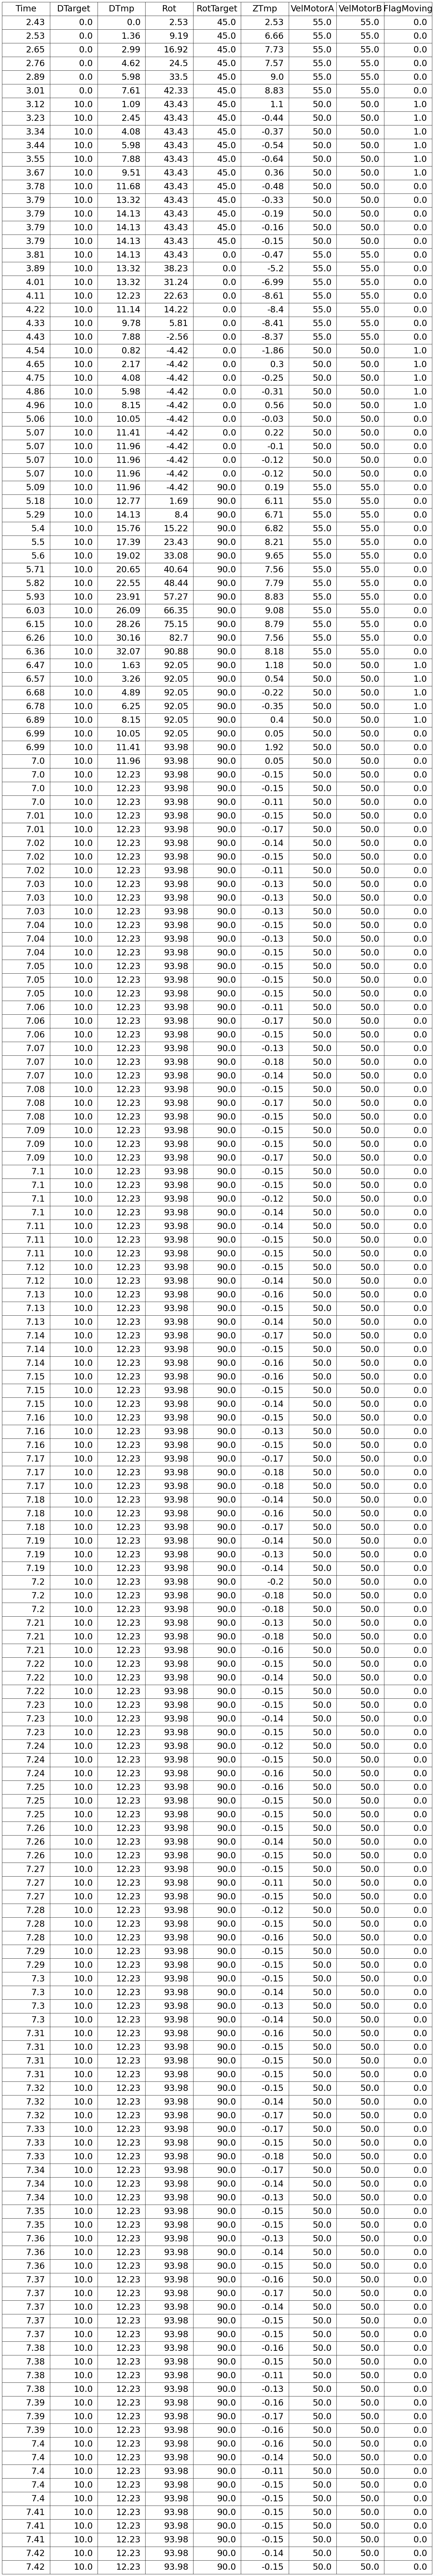

In [249]:
lines = []
files = []

for i in filelist:
    files.append(open(i))

for i in files:
    lines.append(i.readlines())

classes = lines[0][0].split()
del lines[0][0]
    
lines_filtered = []
for i in lines:
    for k in i:
        tmp = []
        replace = k.replace('\n','').replace(':','').split()
        for j in replace:
            tmp.append(float("{:.2f}".format(float(j))))
        lines_filtered.append(tmp)
        
table = plt.table(cellText=lines_filtered,colLabels=classes,loc='center',colWidths=[0.5] * len(classes))
table.auto_set_font_size(False)
table.set_fontsize(30)
table.scale(1, 4)
plt.axis('off')
plt.show()

In [250]:
sample = 0

In [251]:
x = []
dist_target = []
dist_tmp = []
rot =[]
z_tmp = []
vel_motor_A = []
vel_motor_B = []
moving = []
rot_target = []
i_term = []
drift_comp = []
for i in lines_filtered:
    x.append(i[0])
    dist_target.append(i[1])
    dist_tmp.append(i[2])
    rot.append(i[3])
    rot_target.append(i[4])
    z_tmp.append(i[5])
    vel_motor_A.append(i[6])
    vel_motor_B.append(i[7])
    moving.append(i[8])


Text(0.5, 1.0, 'Motores Vel')

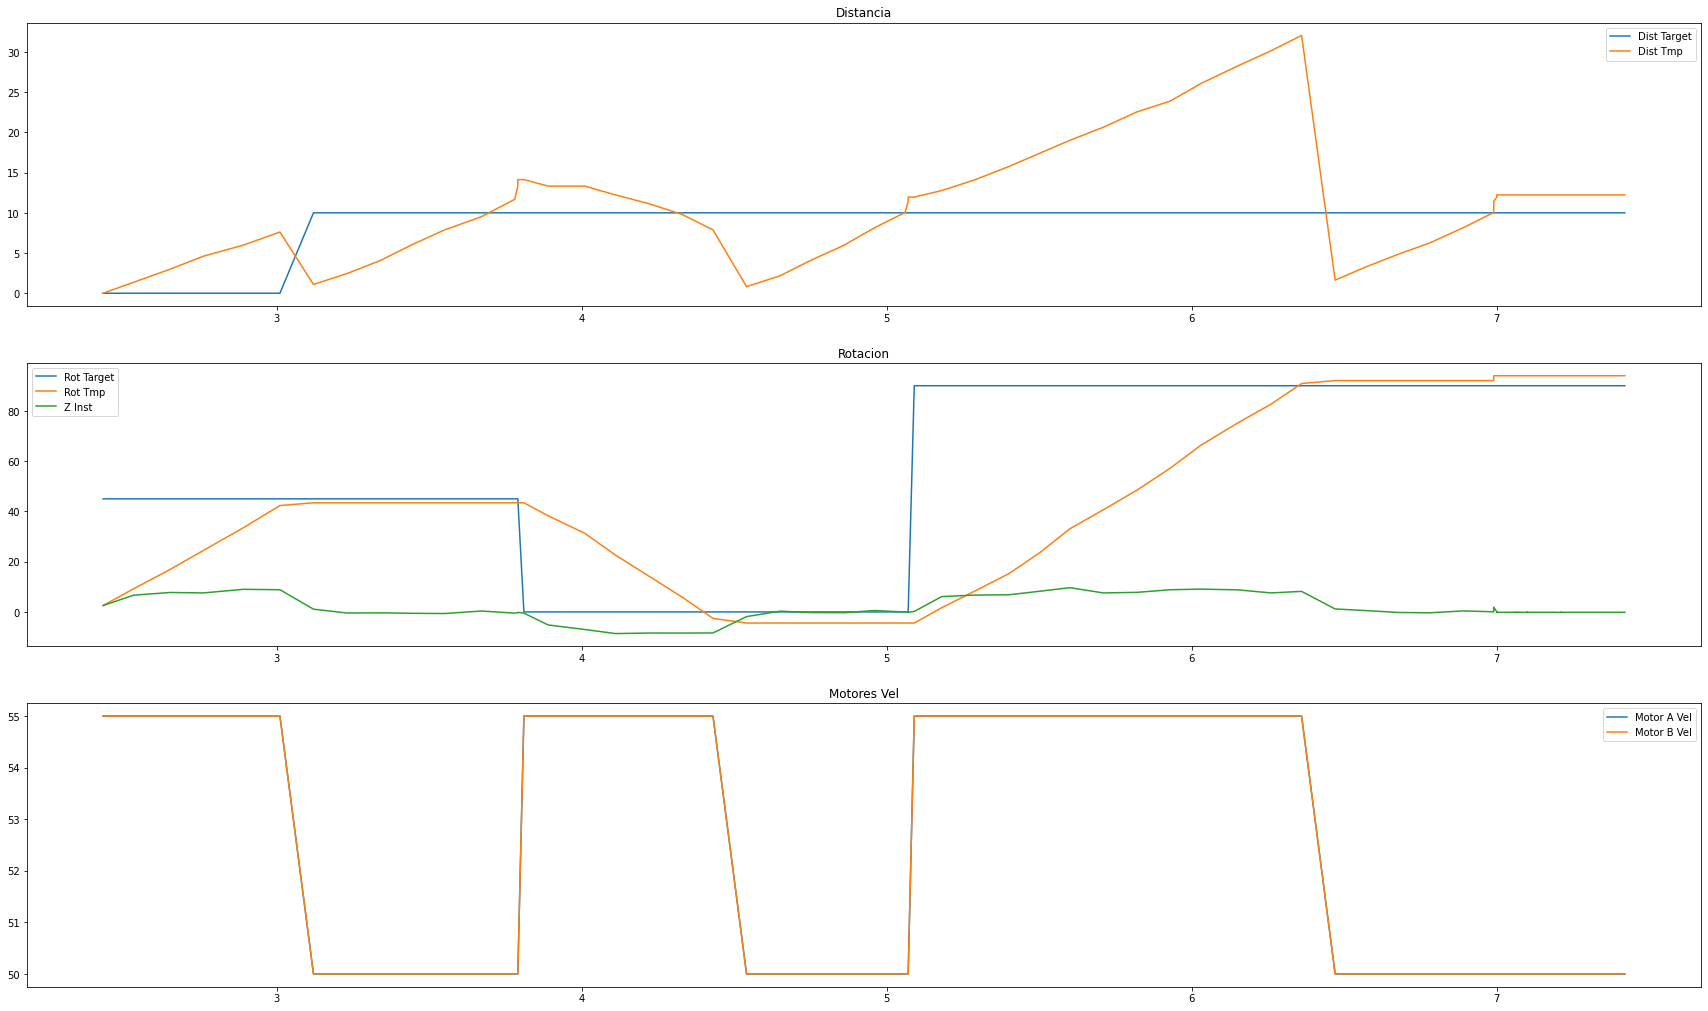

In [252]:
f = plt.figure(figsize=(30,24))
ax = f.add_subplot(411)
ax.plot(x, dist_target, label='Dist Target')
ax.plot(x,dist_tmp, label='Dist Tmp')
ax.legend()
ax.set_title('Distancia')

ax2 = f.add_subplot(412)
ax2.plot(x,rot_target, label= 'Rot Target')
ax2.plot(x,rot, label='Rot Tmp')
ax2.plot(x,z_tmp, label='Z Inst')
ax2.legend()
ax2.set_title('Rotacion')

ax3 = f.add_subplot(413)
ax3.plot(x,vel_motor_A, label= 'Motor A Vel')
ax3.plot(x,vel_motor_B, label= 'Motor B Vel')
ax3.legend()
ax3.set_title('Motores Vel')


# share x only
#ax2 = plt.subplot(312, sharex=ax1)
#plt.plot(t, s2)
# make these tick labels invisible
#plt.setp(ax2.get_xticklabels(), visible=False)